In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random
import pickle
from tensorflow.keras.callbacks import TensorBoard

In [3]:
DIRECTORY=r'/content/drive/MyDrive/Covid_Xray'
CATEGORIES=['Covid19 Negative','Covid19 Positive']

In [4]:

IMG_SIZE=100;
data=[]

for category in CATEGORIES:
    folder=os.path.join(DIRECTORY,category)
    label=CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        img_arr=cv2.imread(img_path)
        try:
           img_arr = cv2.resize(img_arr, (IMG_SIZE,IMG_SIZE))
           #print(img.shape)
        except:
           break
        #img_arr=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
        data.append([img_arr,label])

In [5]:
len(data)

681

In [6]:
random.shuffle(data)

In [7]:
X=[]
Y=[]

for features,labels in data:
    X.append(features)
    Y.append(labels)

In [8]:
X=np.array(X)
Y=np.array(Y)

X=X/255

In [9]:
X.shape

print(Y)

[1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1
 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 

In [10]:
pickle.dump(data,open("dataset",'wb'))

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [12]:
model=Sequential()

model.add( Conv2D(64,(3,3), activation='relu' ) )
model.add( MaxPooling2D( (2,2) ) )

model.add( Conv2D(64,(3,3), activation='relu' ) )
model.add( MaxPooling2D( (2,2) ) )

model.add( Conv2D(64,(3,3), activation='relu' ) )
model.add( MaxPooling2D( (2,2) ) )

model.add( Flatten() )

model.add( Dense(128,input_shape=X.shape[1:],activation='relu') )
model.add(Dense(3,activation='softmax'))

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(X,Y,epochs=15,validation_split=0.1)

Epoch 1/15
20/20 [==============================] - 16s 752ms/step - loss: 0.6911 - accuracy: 0.6477 - val_loss: 0.5198 - val_accuracy: 0.8116
Epoch 2/15
20/20 [==============================] - 15s 731ms/step - loss: 0.4926 - accuracy: 0.7830 - val_loss: 0.3667 - val_accuracy: 0.8261
Epoch 3/15
20/20 [==============================] - 15s 750ms/step - loss: 0.4139 - accuracy: 0.8404 - val_loss: 0.3293 - val_accuracy: 0.8696
Epoch 4/15
20/20 [==============================] - 14s 717ms/step - loss: 0.3521 - accuracy: 0.8768 - val_loss: 0.3043 - val_accuracy: 0.9275
Epoch 5/15
20/20 [==============================] - 14s 721ms/step - loss: 0.3336 - accuracy: 0.9207 - val_loss: 0.3785 - val_accuracy: 0.8551
Epoch 6/15
20/20 [==============================] - 15s 751ms/step - loss: 0.3388 - accuracy: 0.8723 - val_loss: 0.4032 - val_accuracy: 0.8406
Epoch 7/15
20/20 [==============================] - 15s 731ms/step - loss: 0.3332 - accuracy: 0.8766 - val_loss: 0.3344 - val_accuracy: 0.8986

In [15]:
history = model.fit(X,Y,epochs=15,validation_split=0.1)

Epoch 1/15
20/20 [==============================] - 15s 744ms/step - loss: 0.2753 - accuracy: 0.9003 - val_loss: 0.3878 - val_accuracy: 0.8986
Epoch 2/15
20/20 [==============================] - 15s 744ms/step - loss: 0.2797 - accuracy: 0.9069 - val_loss: 0.3083 - val_accuracy: 0.9130
Epoch 3/15
20/20 [==============================] - 15s 742ms/step - loss: 0.2629 - accuracy: 0.9052 - val_loss: 0.3478 - val_accuracy: 0.9130
Epoch 4/15
20/20 [==============================] - 15s 746ms/step - loss: 0.2626 - accuracy: 0.9069 - val_loss: 0.3440 - val_accuracy: 0.9130
Epoch 5/15
20/20 [==============================] - 15s 745ms/step - loss: 0.2580 - accuracy: 0.9069 - val_loss: 0.3561 - val_accuracy: 0.8986
Epoch 6/15
20/20 [==============================] - 15s 742ms/step - loss: 0.2451 - accuracy: 0.9036 - val_loss: 0.3699 - val_accuracy: 0.9130
Epoch 7/15
20/20 [==============================] - 15s 742ms/step - loss: 0.2787 - accuracy: 0.9052 - val_loss: 0.4077 - val_accuracy: 0.8986

In [16]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


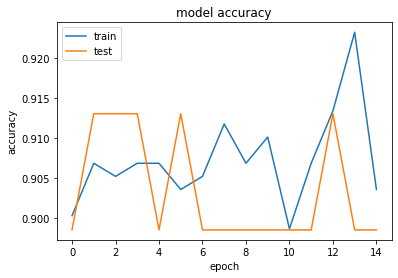

In [17]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

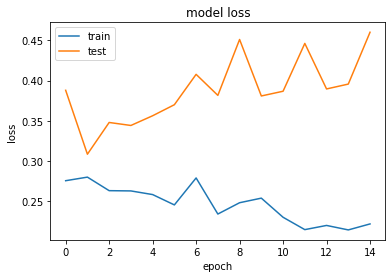

In [18]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0

In [ ]:
model.save("my_model")
#model.save("/content/drive/MyDrive/Models/my_model")

INFO:tensorflow:Assets written to: my_model/assets


In [ ]:
predict_data=data[100]
x=predict_data[0]/255
x

array([[[0.38823529, 0.38823529, 0.38823529],
        [0.44705882, 0.44705882, 0.44705882],
        [0.35294118, 0.35294118, 0.35294118],
        ...,
        [0.40784314, 0.40784314, 0.40784314],
        [0.45098039, 0.45098039, 0.45098039],
        [0.3372549 , 0.3372549 , 0.3372549 ]],

       [[0.38431373, 0.38431373, 0.38431373],
        [0.43137255, 0.43137255, 0.43137255],
        [0.40392157, 0.40392157, 0.40392157],
        ...,
        [0.44705882, 0.44705882, 0.44705882],
        [0.36862745, 0.36862745, 0.36862745],
        [0.36862745, 0.36862745, 0.36862745]],

       [[0.38823529, 0.38823529, 0.38823529],
        [0.4       , 0.4       , 0.4       ],
        [0.47843137, 0.47843137, 0.47843137],
        ...,
        [0.3254902 , 0.3254902 , 0.3254902 ],
        [0.30588235, 0.30588235, 0.30588235],
        [0.25882353, 0.25882353, 0.25882353]],

       ...,

       [[0.48235294, 0.48235294, 0.48235294],
        [0.51372549, 0.51372549, 0.51372549],
        [0.54117647, 0

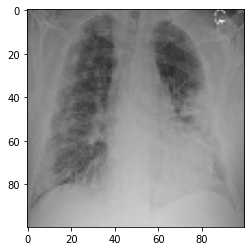

In [ ]:
plt.imshow(x)

In [ ]:
predictions=model.predict(np.array([x]))
predictions

array([[9.044885e-02, 9.094715e-01, 7.955309e-05]], dtype=float32)

In [ ]:
if(predictions[0][0]>0.8):
    print("COVID-19-TEST: NEGATIVE")

if(predictions[0][1]>0.8):
    print("COVID-19-TEST: POSITIVE")


COVID-19-TEST: POSITIVE


In [ ]:
import tensorflow as tf
from tensorflow import keras
#test_img = ''
#test_img_path = tf.keras.utils.get_file('Test Image', origin=test_img)
testimage = r'/content/drive/MyDrive/n2.jpeg'

img = keras.preprocessing.image.load_img(
    testimage, target_size=(IMG_SIZE, IMG_SIZE)
)


img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
#score = tf.nn.softmax(predictions[0])
predictions
print(predictions)
if(predictions[0][0]>0.8):
    print("COVID-19-TEST: NEGATIVE")

if(predictions[0][1]>0.8):
    print("COVID-19-TEST: POSITIVE")


[[1. 0. 0.]]
COVID-19-TEST: NEGATIVE
